In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6) # bütün notebook ta görselle aynı boyutta olacak

import warnings
warnings.filterwarnings("ignore") # verilen uyarının göz ardı edilmesi için

## Read Dataset

In [33]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


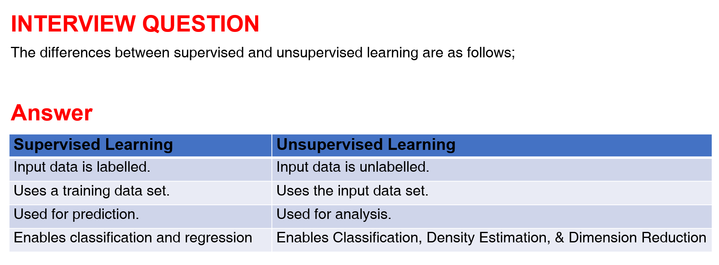

Satir = Gozlem = Row = Sample = Observation

Bagimsiz degisken = Attribute = Estimator = Independent Variable = Faeture(s)

Bagimli degisken = Dependent Variable = Output Label = Target

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.sample(5)

,TV,radio,newspaper,sales
197,177.0,9.3,6.4,12.8
91,28.6,1.5,33.0,7.3
28,248.8,27.1,22.9,18.9
27,240.1,16.7,22.9,15.9
6,57.5,32.8,23.5,11.8


In [7]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# multicollinearity varlığı overfitting e neden olan sebeplerden biridir

TV, radio, newspaper = Feature
sales = Target

In [35]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [39]:
sns.pairplot(data=df);

In [40]:
sns.heatmap(df.corr(), annot = True);

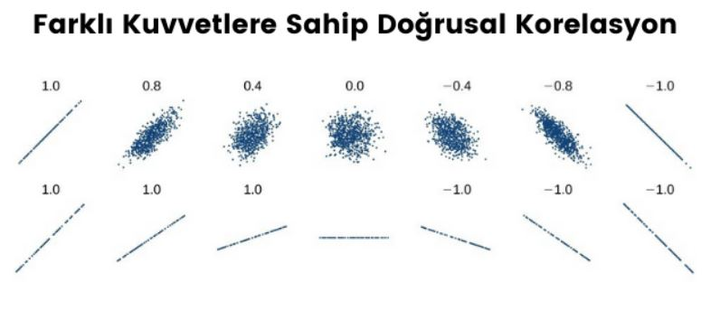

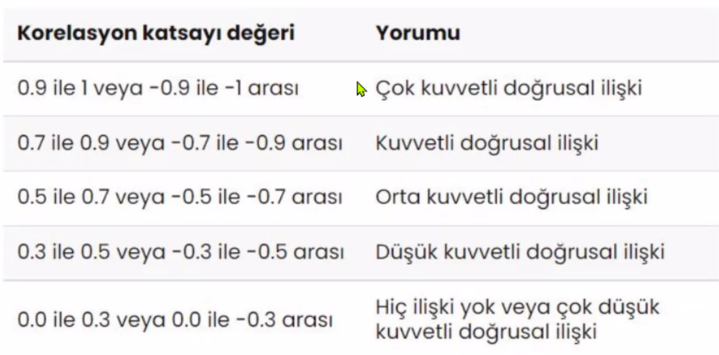

In [41]:
df["totol_spend"] = df.TV + df.radio + df.newspaper
df

,TV,radio,newspaper,sales,totol_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [ ]:
# y = ax + b şeklinde bir lineer regresyon modeli oluşturmak için ( 1 tane y değeri, 1 tane x değeri )  böyle yaptık

In [42]:
df = df.iloc[:, [0, 1, 2, 4, 3]]
df.head(1)


,TV,radio,newspaper,totol_spend,sales
0,230.1,37.8,69.2,337.1,22.1


In [43]:
sns.pairplot()

TypeError: pairplot() missing 1 required positional argument: 'data'

In [22]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [23]:
import scipy.stats as stats

In [26]:
for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i:<15}: {df.sales.corr(df[i])}")

corr between sales and TV             : 0.7822244248616061
corr between sales and radio          : 0.5762225745710551
corr between sales and newspaper      : 0.22829902637616528
corr between sales and totol_spend    : 0.8677123027017427


In [31]:
sns.heatmap(df.corr(), annot = True);

## Yeni Data Frame ile Devam Ediyoruz

In [45]:
df = df[["total_spend", "sales"]]
df.head()

KeyError: "['total_spend'] not in index"

In [30]:
sns.scatterplot(x = "total_spend", y = "sales", data = df);

ValueError: Could not interpret value `total_spend` for parameter `x`

In [48]:
corr = df.sales.corr(df.total_spend)
corr

AttributeError: 'DataFrame' object has no attribute 'total_spend'

In [ ]:
df["total_spend"].corr(df["sales"])

## Coeffciant of Determination (R2)

In [47]:
R2_score = corr ** 2
R2_score

NameError: name 'corr' is not defined

In [ ]:
# total reklam harcamalari, salesideki degisimlerin %75 ini acikliyor

##  Linear Regression

y = b1 * X +b0
y = Target = Bağımlı değişken = dependent variable
b1 = Katsayı/eğim, slope 0< b1 < 1 and -1 < b1 < 0  ?
X = Feature(s), bağımsız değişken, independent variable
b0 = Intercept, otonom parametre, başlangıç parametresi -∞ < 0 < +∞

## Determination of coefficients (slopes and intercept)

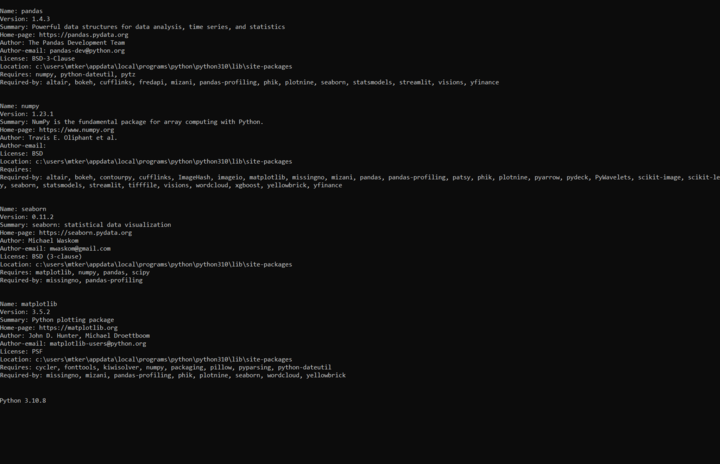

In [50]:
numpay version

SyntaxError: invalid syntax (4061674062.py, line 1)